In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
import math

In [13]:
#將資料整理為csv檔，方便日後整理與修改
df = pd.read_csv('KNN.csv',encoding='utf-8')    #匯入檔案
df.head()                                       #列出資料表頭

,num,temp,humid,bake,buy,delivery,rate
0,1,123,23,0,0,0,1
1,2,126,23,1,1,1,0
2,3,124,25,1,0,1,0
3,4,122,23,0,0,0,1
4,5,124,26,1,0,1,0


In [14]:
df.columns  #利用函式取得列標籤

Index(['num', 'temp', 'humid', 'bake', 'buy', 'delivery', 'rate'], dtype='object')

In [15]:
df = df[['temp','humid','rate']]    #取出要用的資料
df                                  #資料預覽

,temp,humid,rate
0,123,23,1
1,126,23,0
2,124,25,0
3,122,23,1
4,124,26,0
5,124,22,1


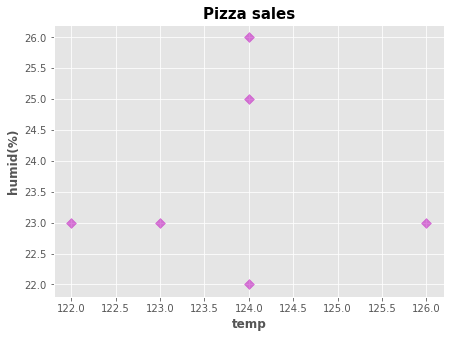

In [16]:
# 資料圖像化


plt.figure(figsize=(7,5))                                       #顯示圖框架大小

plt.style.use("ggplot")                                         #使用ggplot主題樣式
plt.xlabel("temp", fontweight = "bold")                         #設定x座標標題及粗體
plt.ylabel("humid(%)", fontweight = "bold")                     #設定y座標標題及粗體
plt.title("Pizza sales", fontsize = 15, fontweight = "bold")    #設定標題、字大小及粗體

plt.scatter(df["temp"],             # x軸資料
            df["humid"],            # y軸資料
            c = "m",                # 點顏色
            s = 50,                 # 點大小
            alpha = .5,             # 透明度
            marker = "D")           # 菱形圖示

In [17]:

nparray = np.array(df)          #資料由全部轉換為個別陣列
p0 = np.array(nparray[0,:])
p1 = np.array(nparray[1,:])
p2 = np.array(nparray[2,:])
p3 = np.array(nparray[3,:])
p4 = np.array(nparray[4,:])
p5 = np.array(nparray[5,:])
un = [127,23]

In [18]:
# 距離計算 利用畢氏定理算距離

x0=eval(str(p0[0]))
y0=eval(str(p0[1]))

x1=eval(str(p1[0]))
y1=eval(str(p1[1]))

x2=eval(str(p2[0]))
y2=eval(str(p2[1]))

x3=eval(str(p3[0]))
y3=eval(str(p3[1]))

x4=eval(str(p4[0]))
y4=eval(str(p4[1]))

x5=eval(str(p5[0]))
y5=eval(str(p5[1]))

unx=eval(str(un[0]))
uny=eval(str(un[1]))

Dis0=math.sqrt((x0-unx)**2+(y0-uny)**2)
Dis1=math.sqrt((x1-unx)**2+(y1-uny)**2)
Dis2=math.sqrt((x2-unx)**2+(y2-uny)**2)
Dis3=math.sqrt((x3-unx)**2+(y3-uny)**2)
Dis4=math.sqrt((x4-unx)**2+(y4-uny)**2)
Dis5=math.sqrt((x5-unx)**2+(y5-uny)**2)

print("(",x0,",",y0,")")
print("(",x1,",",y1,")")
print("(",x2,",",y2,")")
print("(",x3,",",y3,")")
print("(",x4,",",y4,")")
print("(",x5,",",y5,")")
print("(",unx,",",uny,")")
print("Distance = {:.4f}".format(Dis0))
print("Distance = {:.4f}".format(Dis1))
print("Distance = {:.4f}".format(Dis2))
print("Distance = {:.4f}".format(Dis3))
print("Distance = {:.4f}".format(Dis4))
print("Distance = {:.4f}".format(Dis5))
dis = [Dis0,Dis1,Dis2,Dis3,Dis4,Dis5]
min_index = np.argmin(dis)
print(dis)


( 123 , 23 )
( 126 , 23 )
( 124 , 25 )
( 122 , 23 )
( 124 , 26 )
( 124 , 22 )
( 127 , 23 )
Distance = 4.0000
Distance = 1.0000
Distance = 3.6056
Distance = 5.0000
Distance = 4.2426
Distance = 3.1623
[4.0, 1.0, 3.605551275463989, 5.0, 4.242640687119285, 3.1622776601683795]


In [19]:
df['distance'] = dis    #合併距離至資料內
df

,temp,humid,rate,distance
0,123,23,1,4.000000
1,126,23,0,1.000000
2,124,25,0,3.605551
3,122,23,1,5.000000
4,124,26,0,4.242641
5,124,22,1,3.162278


In [20]:
# 蒐集使用者輸入的K值

df_sorted = df.sort_values(by='distance')
k = int(input())
df_final = df_sorted.head(k)

In [21]:
bad, good = df_final['rate'].value_counts()[0], df_final['rate'].value_counts()[1]  #計算好壞或無法分辨

In [22]:
# 輸出結果

if bad > good:
    print("bad")
elif bad < good:
    print("good")
else:
    print("tie")

bad
